# pythia-features-multicore

In [1]:
from importlib import reload

from matplotlib import cm
import numpy as np

from utils import plots, tables, utils
#%matplotlib widget

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Knobs
paths = {
    'degree1_baseline_2c': '/u/cmolder/GitHub/ChampSim/out/pythia/2core/degree1_baseline.csv',
}

suites = [
    #('spec06', 'one_phase'),
    ('spec06', 'weighted'),
    ('gap', 'one_phase')
]
metrics  = [
    'ipc_improvement', 
    #'L2C_issued_prefetches', 
    'L2C_accuracy', 
    'L2C_coverage',
    #'L2C_mpki_reduction', 
]
features = [
    {'Delta_Path', 'PC_Delta'},
    {'Delta_Path', 'PC_Delta', 'Page'},
    {'Delta_Path', 'PC_Delta', 'Page', 'Offset'},
]
baselines = [
    'bo'
]
dpi = 150

# Plots (suites)
Fix prefetch degree to 1 for everything.

In [3]:
dfs = {
    'baseline_2c': tables.load_stats_csv(paths['degree1_baseline_2c'], baselines, prefetchers_level='l2'),
    'degree1_2c': tables.load_stats_csv_pythia(paths['degree1_baseline_2c'], features),
}
dfs['degree1_2c'].keys()

/u/cmolder/GitHub/pythia-analysis/utils/utils.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.filter(regex='simpoint').fillna('default', inplace=True)
/u/cmolder/GitHub/pythia-analysis/utils/utils.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.filter(regex='simpoint').fillna('default', inplace=True)


dict_keys(['Delta_Path, PC_Delta', 'Delta_Path, PC_Delta, Page', 'Delta_Path, Offset, PC_Delta, Page'])

## 2-core

/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)


=== spec06 weighted ===


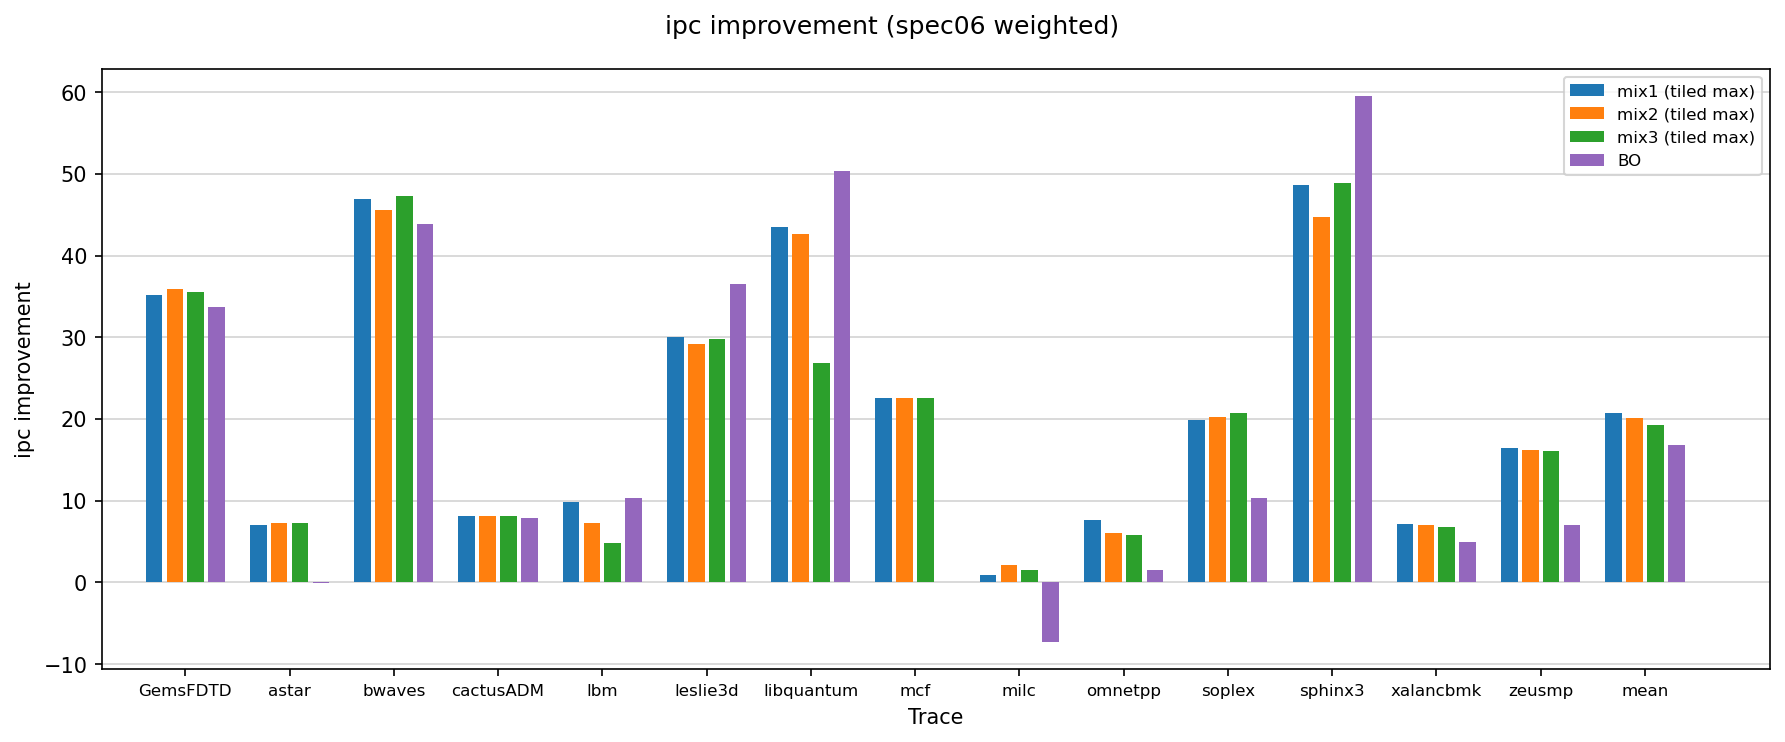

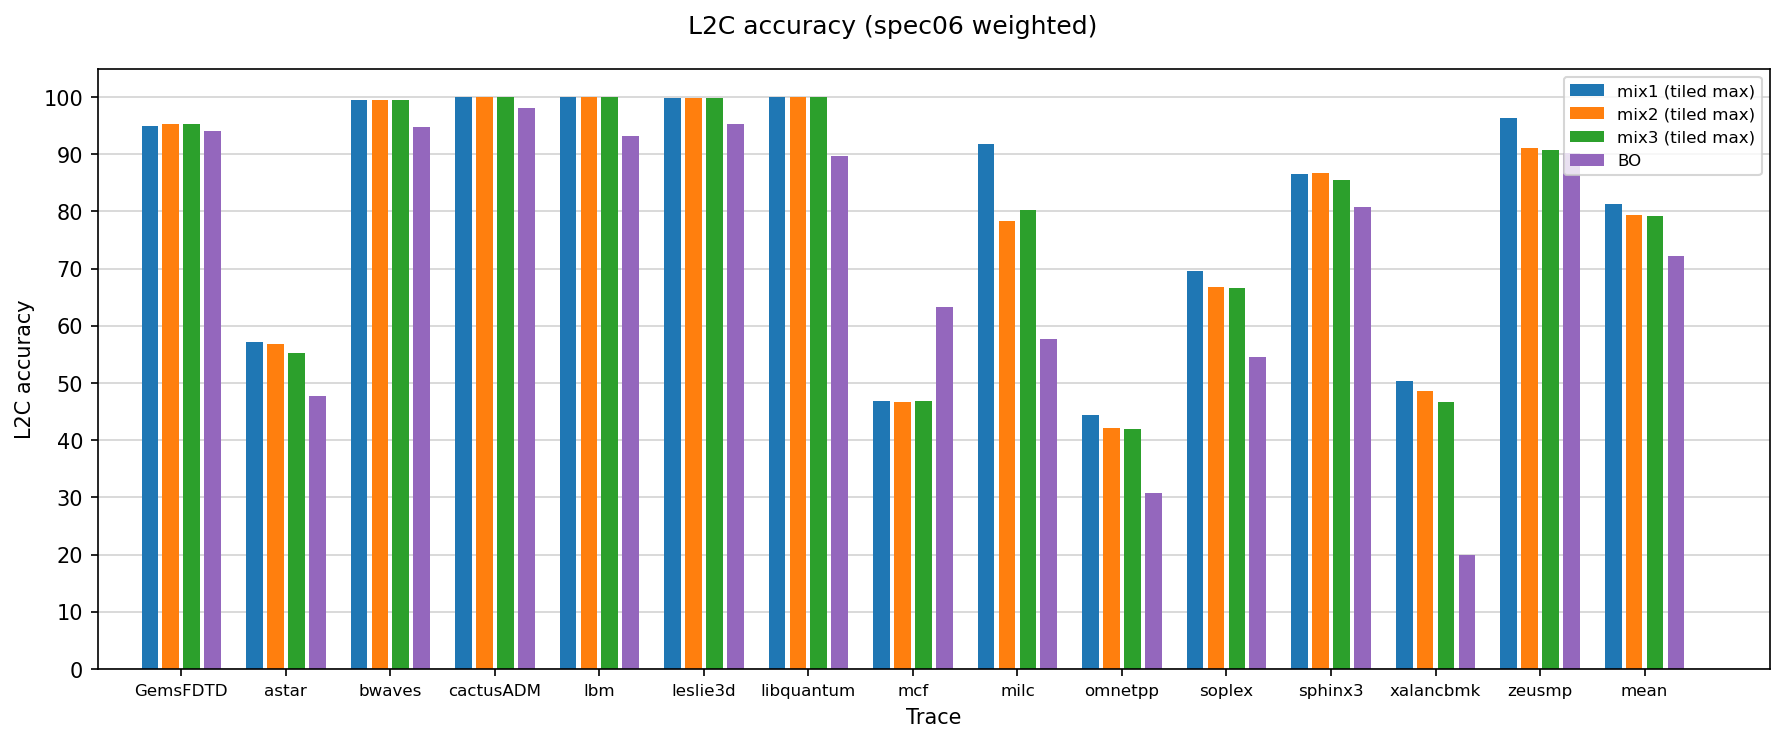

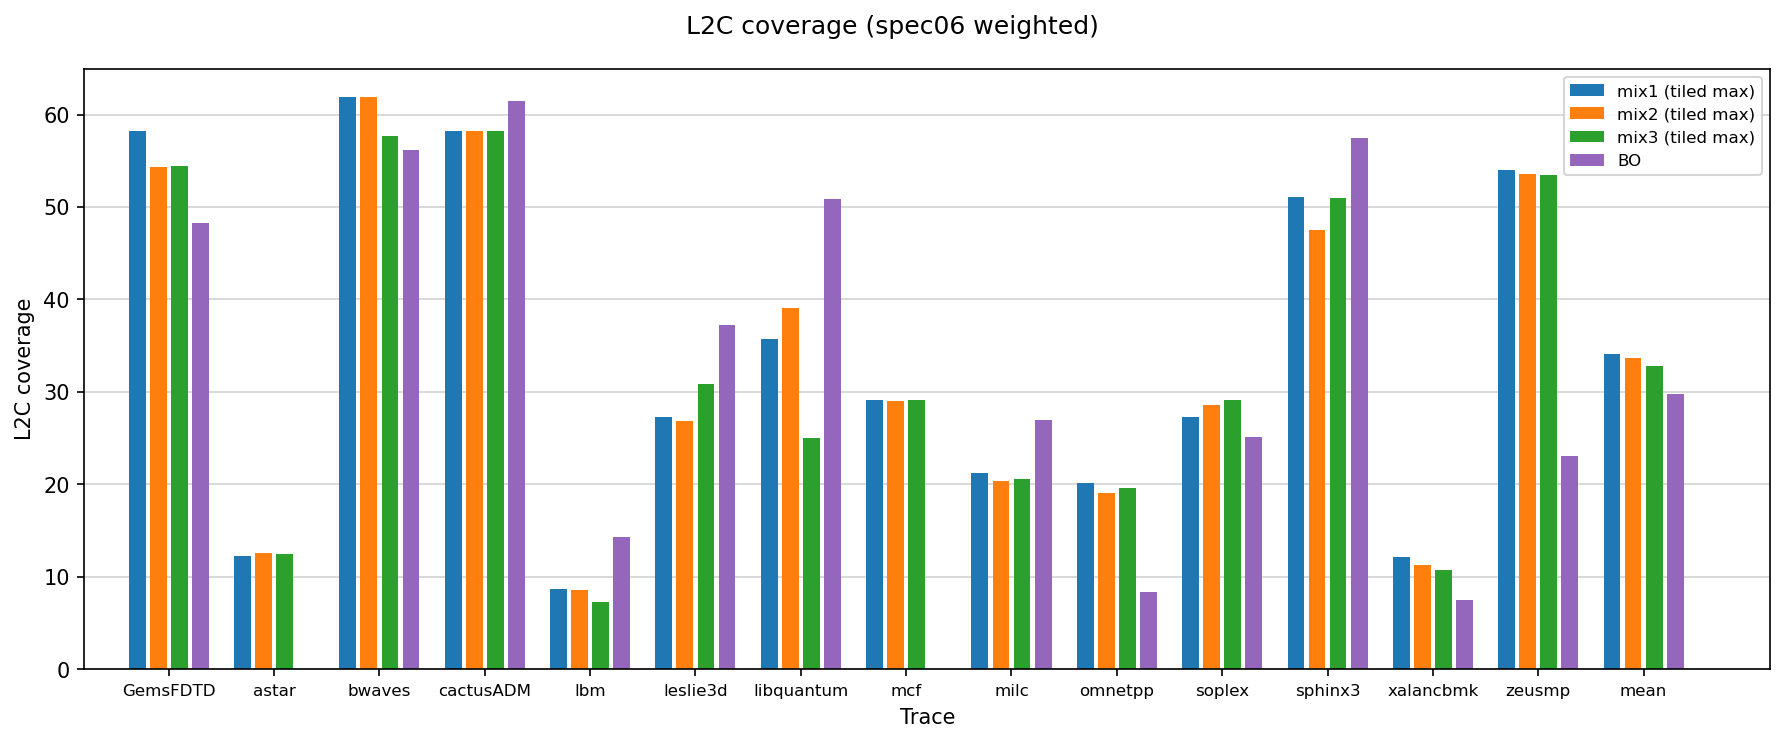

/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)


=== gap one_phase ===


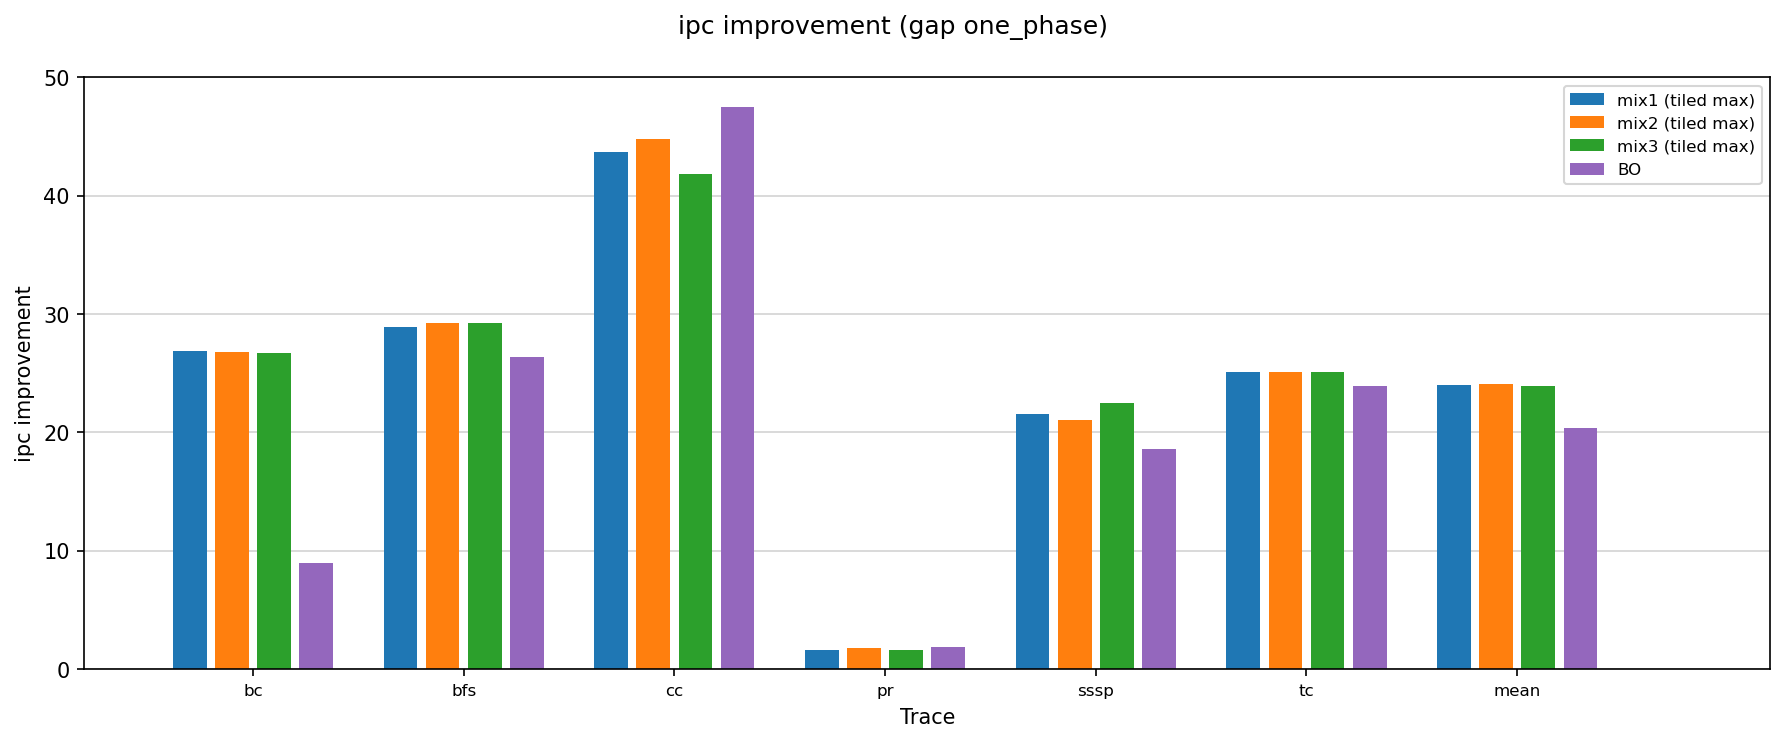

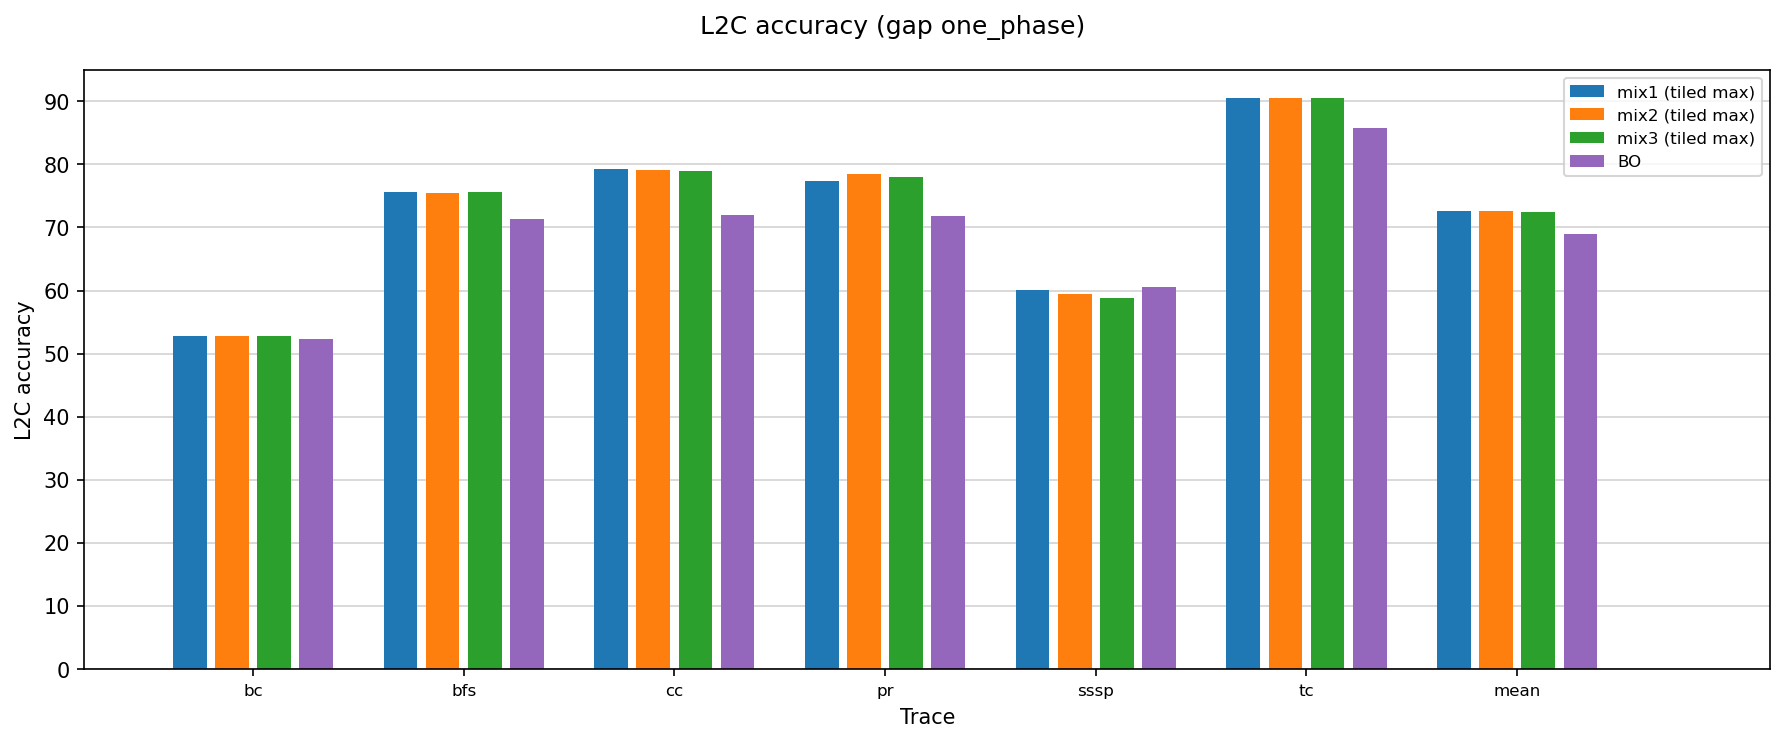

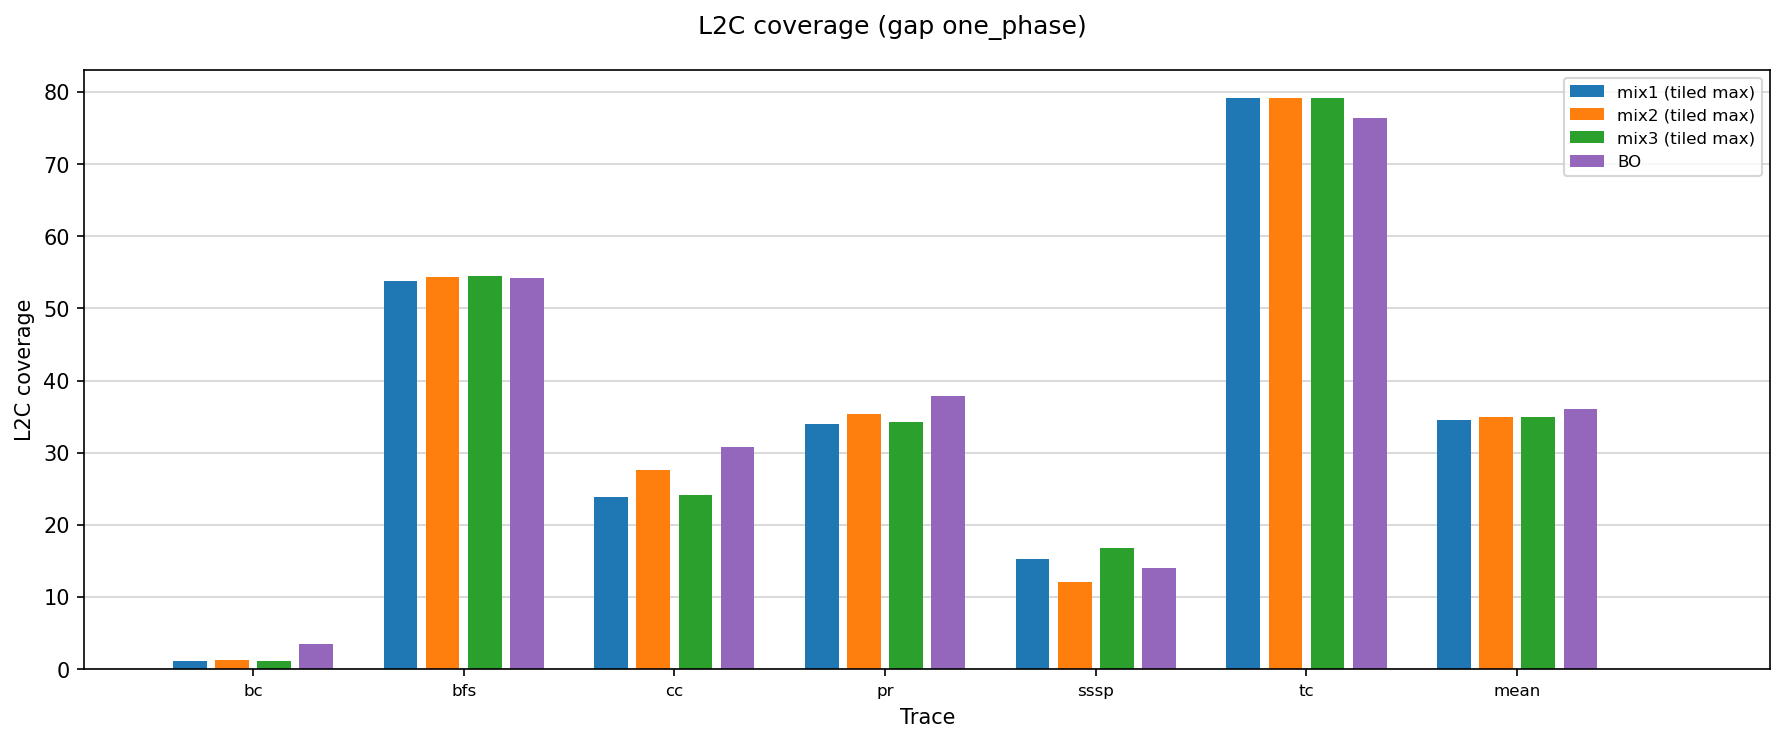

In [11]:
df_2core = {
    'mix1 (tiled max)': dfs['degree1_2c']['Delta_Path, PC_Delta'],
    'mix2 (tiled max)': dfs['degree1_2c']['Delta_Path, PC_Delta, Page'],
    'mix3 (tiled max)': dfs['degree1_2c']['Delta_Path, Offset, PC_Delta, Page'],
    'BO': dfs['baseline_2c']['bo'],
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 1,
    #'loc': 'upper left',
    #'bbox_to_anchor': (0, 1),
}
df_2core_colors = {
    'BO': 'C4'
}
label_kwargs = {
    'fontsize': 8,
    'rotation': 0
}
plots.plot_everything(df_2core, suites=suites, metrics=metrics, 
                      colors=df_2core_colors, dpi=dpi, figsize=(12, 5),
                      legend_kwargs=legend_kwargs, label_kwargs=label_kwargs)

# Tables

## 2-core

In [12]:
tables.table_everything(df_2core, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
GemsFDTD_weighted,35.115381,35.866709,35.524214,33.674454
astar_weighted,7.048583,7.251873,7.283337,-0.041291
bwaves_weighted,46.878634,45.627608,47.317582,43.858087
cactusADM_weighted,8.133379,8.133379,8.133379,7.853345
lbm_weighted,9.779953,7.260680,4.799194,10.366257
leslie3d_weighted,29.972817,29.199446,29.766812,36.555489
libquantum_weighted,43.453543,42.598822,26.839081,50.294265
mcf_weighted,22.553971,22.526570,22.577320,0.006070
milc_weighted,0.857341,2.149989,1.492795,-7.280164


L2C_accuracy


/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
GemsFDTD_weighted,94.898018,95.307740,95.314621,94.108424
astar_weighted,57.144853,56.843394,55.279277,47.720438
bwaves_weighted,99.573513,99.573644,99.573721,94.702560
cactusADM_weighted,99.932514,99.932514,99.932514,98.096294
lbm_weighted,99.987314,99.987409,99.987912,93.129169
leslie3d_weighted,99.895195,99.895831,99.874110,95.285113
libquantum_weighted,99.998365,99.998459,99.998471,89.738454
mcf_weighted,46.828872,46.766915,46.794421,63.372982
milc_weighted,91.773680,78.270832,80.214646,57.666290


L2C_coverage


/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
GemsFDTD_weighted,58.202685,54.323899,54.426300,48.280760
astar_weighted,12.263439,12.553456,12.498099,0.060634
bwaves_weighted,61.887424,61.854112,57.653153,56.181434
cactusADM_weighted,58.268540,58.268540,58.268540,61.513835
lbm_weighted,8.661189,8.572551,7.242527,14.327665
leslie3d_weighted,27.291150,26.808337,30.859267,37.219851
libquantum_weighted,35.735815,39.072135,24.977852,50.887867
mcf_weighted,29.082501,29.025335,29.102766,0.020823
milc_weighted,21.163685,20.329806,20.615655,26.957626


=== gap one_phase ===
ipc_improvement


/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
bc,26.857059,26.759565,26.710935,8.937405
bfs,28.920911,29.287414,29.247711,26.360698
cc,43.706576,44.759918,41.807685,47.506484
pr,1.579436,1.822413,1.624284,1.906880
sssp,21.564399,21.060484,22.460191,18.588951
tc,25.084894,25.091074,25.082430,23.896731
mean,23.971528,24.129852,23.885623,20.360677


L2C_accuracy


/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
bc,52.805703,52.802021,52.800134,52.379131
bfs,75.627615,75.503912,75.563469,71.291564
cc,79.305989,79.134140,79.012067,71.901521
pr,77.420116,78.398560,77.951267,71.873239
sssp,60.124764,59.522715,58.808044,60.535380
tc,90.506400,90.503056,90.506610,85.720092
mean,72.631764,72.644068,72.440265,68.950155


L2C_coverage


/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)


,mix1 (tiled max),mix2 (tiled max),mix3 (tiled max),BO
run_name,,,,
bc,1.156791,1.196756,1.153588,3.522427
bfs,53.729961,54.348692,54.527954,54.197699
cc,23.828007,27.612205,24.191651,30.808072
pr,33.985781,35.393242,34.292256,37.811360
sssp,15.232406,12.040673,16.766433,13.947438
tc,79.159299,79.148873,79.139126,76.431429
mean,34.515374,34.956740,35.011835,36.119737
